# 1. Selesaikanlah tabel data di bawah ini dengan metode klasifikasi menggunakan Algoritma Pohon Keputusan (Decision Tree) / Algoritma C4.5. Tentukan Root Nodenya, Child Nodenya, dst, dengan menggunakan rumus Information Gain, Gain dan Entropy.


## Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## LANGKAH 1: BACA DATA

In [5]:
print("LANGKAH 1: MEMBACA DATA")
print("-" * 40)
df = pd.read_csv('dataset/credit_data.csv')
print(" Data berhasil dibaca dari CSV")
print(f" Jumlah data: {len(df)} baris, {len(df.columns)} kolom")
print("\nPreview data:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

LANGKAH 1: MEMBACA DATA
----------------------------------------
 Data berhasil dibaca dari CSV
 Jumlah data: 14 baris, 6 kolom

Preview data:
   NO         AGE  INCOME STUDENT CREDIT_RATING CLASS
0   1       youth    high      no          fair    no
1   2       youth    high      no     excellent    no
2   3  middle age    high      no          fair   yes
3   4      senior  medium      no          fair   yes
4   5      senior     low     yes          fair   yes

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NO             14 non-null     int64 
 1   AGE            14 non-null     object
 2   INCOME         14 non-null     object
 3   STUDENT        14 non-null     object
 4   CREDIT_RATING  14 non-null     object
 5   CLASS          14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes
None


## LANGKAH 2: EKSPLORASI DATA

In [6]:
print("\n\nLANGKAH 2: EKSPLORASI DATA")
print("-" * 40)
print(f"\nDistribusi Class:")
class_dist = df['CLASS'].value_counts()
print(f"\nDistribusi Class:")
print(f"- yes: {class_dist['yes']} ({class_dist['yes']/len(df)*100:.1f}%)")
print(f"- no: {class_dist['no']} ({class_dist['no']/len(df)*100:.1f}%)")




LANGKAH 2: EKSPLORASI DATA
----------------------------------------

Distribusi Class:

Distribusi Class:
- yes: 9 (64.3%)
- no: 5 (35.7%)


## LANGKAH 3: PREPROCESSING

In [11]:
print("\n\nLANGKAH 3: PREPROCESSING DATA")
print("-" * 40)

# Label Encoding untuk mengubah data kategorikal menjadi numerik
encoders = {}
encoded_df = df.copy()

feature_cols = ['STUDENT', 'CREDIT_RATING']
feature_cols = ['AGE', 'INCOME', 'STUDENT', 'CREDIT_RATING']
target_col = 'CLASS'

print("Mapping encoding untuk setiap fitur:")
for col in feature_cols + [target_col]:
    le = LabelEncoder()
    encoded_df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")



LANGKAH 3: PREPROCESSING DATA
----------------------------------------
Mapping encoding untuk setiap fitur:
AGE: {'middle age': np.int64(0), 'senior': np.int64(1), 'youth': np.int64(2)}
INCOME: {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}
STUDENT: {'no': np.int64(0), 'yes': np.int64(1)}
CREDIT_RATING: {'excellent': np.int64(0), 'fair': np.int64(1)}
CLASS: {'no': np.int64(0), 'yes': np.int64(1)}


In [30]:
encoded_df

,NO,AGE,INCOME,STUDENT,CREDIT_RATING,CLASS,STUDENT_encoded,CREDIT_RATING_encoded,CLASS_encoded
0,1,18,8000000,Tidak,Baik,Tidak,0,0,0
1,2,19,9000000,Tidak,Sangat Baik,Tidak,0,1,0
2,3,35,9500000,Tidak,Baik,Ya,0,0,1
3,4,52,6000000,Tidak,Baik,Ya,0,0,1
4,5,56,3500000,Ya,Baik,Ya,1,0,1
5,6,60,3000000,Ya,Sangat Baik,Tidak,1,1,0
6,7,40,3200000,Ya,Sangat Baik,Ya,1,1,1
7,8,21,5500000,Tidak,Baik,Tidak,0,0,0
8,9,23,2500000,Ya,Baik,Ya,1,0,1
9,10,58,5000000,Ya,Baik,Ya,1,0,1


##  LANGKAH 4: PERSIAPAN FEATURES DAN TARGET

In [14]:
print("\n\nLANGKAH 4: PERSIAPAN FEATURES DAN TARGET")
print("-" * 40)

X = encoded_df[['AGE_encoded', 'INCOME_encoded','STUDENT_encoded', 'CREDIT_RATING_encoded']]
y = encoded_df['CLASS_encoded']

print("Features (X):")
print(X)
print(f"\nTarget (y): {y.values}")



LANGKAH 4: PERSIAPAN FEATURES DAN TARGET
----------------------------------------
Features (X):
    AGE_encoded  INCOME_encoded  STUDENT_encoded  CREDIT_RATING_encoded
0             2               0                0                      1
1             2               0                0                      0
2             0               0                0                      1
3             1               2                0                      1
4             1               1                1                      1
5             1               1                1                      0
6             0               1                1                      0
7             2               2                0                      1
8             2               1                1                      1
9             1               2                1                      1
10            2               2                1                      0
11            0               2       

## LANGKAH 5: MEMBUAT DECISION TREE

In [15]:
print("\n\nLANGKAH 5: MEMBUAT DECISION TREE (C4.5)")
print("-" * 40)

# Inisialisasi Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)


print("Parameter Decision Tree:")
print(f"- Criterion: {dt_classifier.criterion} (Information Gain)")
print(f"- Max Depth: {dt_classifier.max_depth}")
print(f"- Min Samples Split: {dt_classifier.min_samples_split}")
print(f"- Min Samples Leaf: {dt_classifier.min_samples_leaf}")

# Training model
dt_classifier.fit(X, y)
print(" Model Decision Tree berhasil dilatih!")



LANGKAH 5: MEMBUAT DECISION TREE (C4.5)
----------------------------------------
Parameter Decision Tree:
- Criterion: entropy (Information Gain)
- Max Depth: None
- Min Samples Split: 2
- Min Samples Leaf: 1
 Model Decision Tree berhasil dilatih!


## LANGKAH 6: EVALUASI MODEL

In [16]:
print("\n\nLANGKAH 6: EVALUASI MODEL")
print("-" * 40)

# Prediksi
y_pred = dt_classifier.predict(X)
accuracy = dt_classifier.score(X, y)

print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
target_names = encoders['CLASS'].classes_
print(classification_report(y, y_pred, target_names=target_names, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)



LANGKAH 6: EVALUASI MODEL
----------------------------------------
Akurasi: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00         5
         yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


Confusion Matrix:
[[5 0]
 [0 9]]


## LANGKAH 7: ATURAN DECISION TREE

In [17]:
print("\n\nLANGKAH 7: ATURAN DECISION TREE")
print("-" * 40)

class_names = encoders['CLASS'].classes_
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)




LANGKAH 7: ATURAN DECISION TREE
----------------------------------------
|--- AGE_encoded <= 0.50
|   |--- class: 1
|--- AGE_encoded >  0.50
|   |--- STUDENT_encoded <= 0.50
|   |   |--- AGE_encoded <= 1.50
|   |   |   |--- CREDIT_RATING_encoded <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- CREDIT_RATING_encoded >  0.50
|   |   |   |   |--- class: 1
|   |   |--- AGE_encoded >  1.50
|   |   |   |--- class: 0
|   |--- STUDENT_encoded >  0.50
|   |   |--- CREDIT_RATING_encoded <= 0.50
|   |   |   |--- INCOME_encoded <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- INCOME_encoded >  1.50
|   |   |   |   |--- class: 1
|   |   |--- CREDIT_RATING_encoded >  0.50
|   |   |   |--- class: 1



## LANGKAH 8: FEATURE IMPORTANCE

In [18]:
print("\n\nLANGKAH 8: FEATURE IMPORTANCE")
print("-" * 40)

importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']:15}: {row['Importance']:.4f}")




LANGKAH 8: FEATURE IMPORTANCE
----------------------------------------
Feature Importance:
AGE_encoded    : 0.3626
CREDIT_RATING_encoded: 0.2742
STUDENT_encoded: 0.2112
INCOME_encoded : 0.1519


## LANGKAH 9: CONTOH PREDIKSI BARU

In [21]:
print("\n\nLANGKAH 9: CONTOH PREDIKSI DATA BARU")
print("-" * 40)

def predict_credit(age, income, student, credit_rating):
    """Fungsi untuk prediksi kredit dengan input kategorikal"""
    
    # Encode input
    age_encoded = encoders['AGE'].transform([age])[0]
    income_encoded = encoders['INCOME'].transform([income])[0]
    student_encoded = encoders['STUDENT'].transform([student])[0]
    credit_encoded = encoders['CREDIT_RATING'].transform([credit_rating])[0]
    
    
    input_df = pd.DataFrame([[age_encoded, income_encoded, student_encoded, credit_encoded]], columns=X.columns)

    # Prediksi
    prediction = dt_classifier.predict(input_df)[0]
    probability = dt_classifier.predict_proba(input_df)[0]
    
    result = encoders['CLASS'].inverse_transform([prediction])[0]
    
    print(f"Input: Age={age}, Income={income}, Student={student}, Credit={credit_rating}")
    print(f"Prediksi: {result}")
    print(f"Probabilitas [Tidak, Ya]: [{probability[0]:.3f}, {probability[1]:.3f}]")
    return result


# Test Data kasus
print("Contoh prediksi:")
predict_credit('middle age', 'high', 'yes', 'fair')
print()
predict_credit('youth','high','no','excellent')



LANGKAH 9: CONTOH PREDIKSI DATA BARU
----------------------------------------
Contoh prediksi:
Input: Age=middle age, Income=high, Student=yes, Credit=fair
Prediksi: yes
Probabilitas [Tidak, Ya]: [0.000, 1.000]

Input: Age=youth, Income=high, Student=no, Credit=excellent
Prediksi: no
Probabilitas [Tidak, Ya]: [1.000, 0.000]


'no'

## LANGKAH 10: VISUALISASI



LANGKAH 10: VISUALISASI
----------------------------------------


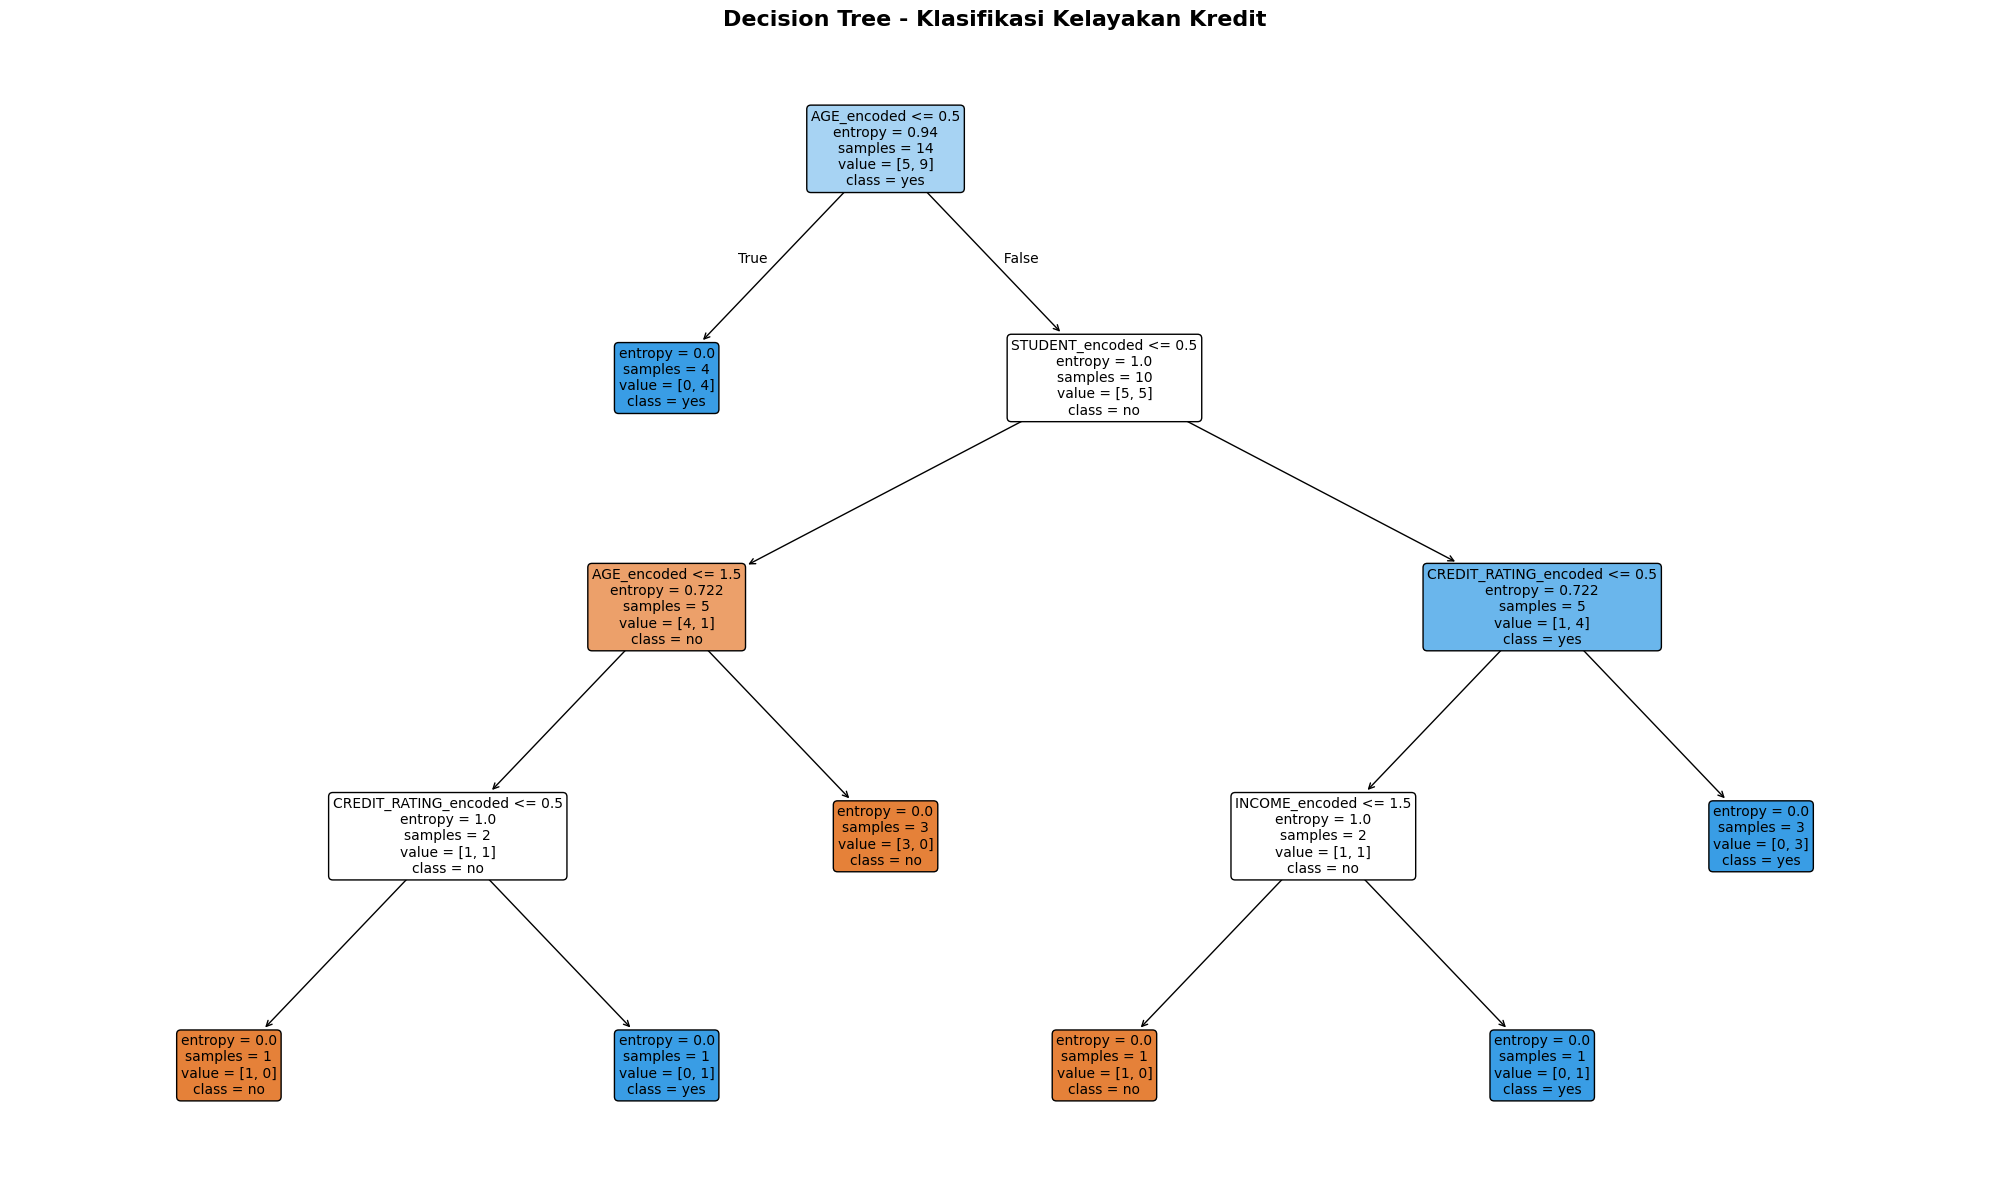

In [22]:
print("\n\nLANGKAH 10: VISUALISASI")
print("-" * 40)

# Plot 1: Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=class_names,
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree - Klasifikasi Kelayakan Kredit", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

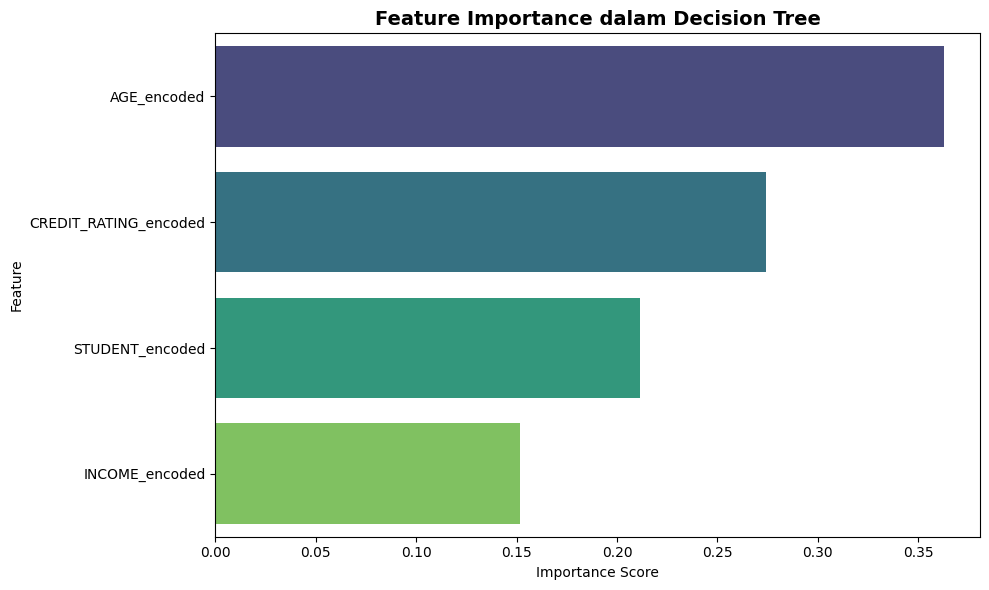

In [23]:
# Plot 2: Feature Importance
plt.figure(figsize=(10, 6))


sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',             
    palette='viridis',
    dodge=False,             
    legend=False              
)

plt.title('Feature Importance dalam Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


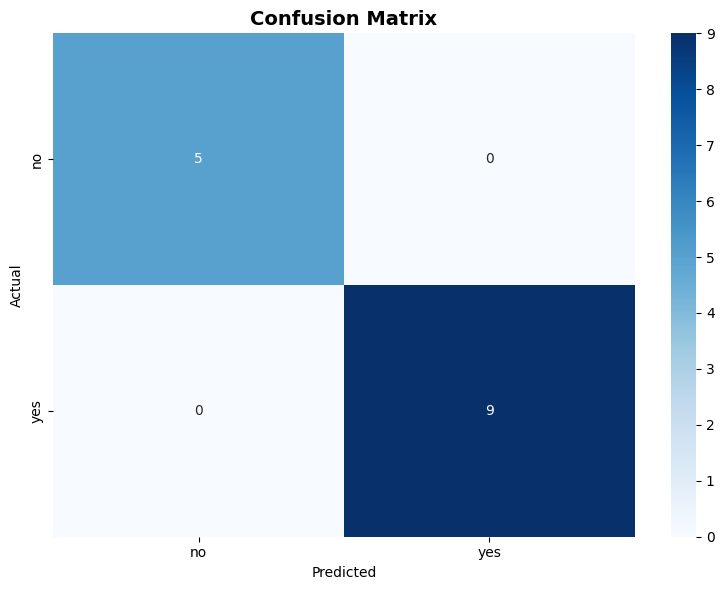

In [24]:
# Plot 3: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## KESIMPULAN

In [25]:
print("\n" + "="*70)
print(" KESIMPULAN:")
print("="*70)
print(f"1. Decision Tree berhasil dibuat dengan akurasi {accuracy*100:.2f}%")
print(f"2. Feature paling penting: {feature_importance_df.iloc[0]['Feature']} ({feature_importance_df.iloc[0]['Importance']:.4f})")
print(f"3. Model menggunakan criterion 'entropy' (Information Gain)")
print(f"4. Total {len(df)} data berhasil diklasifikasi")
print(f"5. Distribusi prediksi: {dict(pd.Series(y_pred).map({0: 'Tidak', 1: 'Ya'}).value_counts())}")
print("="*70)


 KESIMPULAN:
1. Decision Tree berhasil dibuat dengan akurasi 100.00%
2. Feature paling penting: AGE_encoded (0.3626)
3. Model menggunakan criterion 'entropy' (Information Gain)
4. Total 14 data berhasil diklasifikasi
5. Distribusi prediksi: {'Ya': np.int64(9), 'Tidak': np.int64(5)}


# 2. Model Dengan Perhitungan Sederhana Naïve Bayes 

## Import Library

In [26]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

## LANGKAH 1: BACA DATA

In [27]:
print("\n1. LOAD DATA TRAINING")
print("-" * 40)
df = pd.read_csv('dataset/data_mahasiswa.csv')
print(" Data berhasil dimuat")
print(f"Total data: {len(df)} mahasiswa")
print(df.head(10))



1. LOAD DATA TRAINING
----------------------------------------
 Data berhasil dimuat
Total data: 15 mahasiswa
   NO      KELAMIN     STATUS PERNIKAHAN   IPK KETERANGAN
0   1  LAKI - LAKI  MAHASISWA      BELUM  3.17      TEPAT
1   2  LAKI - LAKI    BEKERJA      BELUM  3.30      TEPAT
2   3    PEREMPUAN  MAHASISWA      BELUM  3.01      TEPAT
3   4    PEREMPUAN  MAHASISWA    MENIKAH  3.25      TEPAT
4   5  LAKI - LAKI    BEKERJA    MENIKAH  3.20      TEPAT
5   6  LAKI - LAKI    BEKERJA    MENIKAH  2.50  TERLAMBAT
6   7    PEREMPUAN    BEKERJA    MENIKAH  3.00  TERLAMBAT
7   8    PEREMPUAN    BEKERJA      BELUM  2.70  TERLAMBAT
8   9  LAKI - LAKI    BEKERJA      BELUM  2.40  TERLAMBAT
9  10    PEREMPUAN  MAHASISWA    MENIKAH  2.50  TERLAMBAT


## LANGKAH 2: PREPROCESSING

In [28]:
print("\n2. PREPROCESSING DATA")
print("-" * 40)

# Label Encoding untuk mengubah data kategorikal menjadi numerik
encoders = {}
encoded_df = df.copy()

feature_cols = ['KELAMIN', 'STATUS', 'PERNIKAHAN',]
target_col = 'KETERANGAN'

print("Mapping encoding untuk setiap fitur:")
for col in feature_cols + [target_col]:
    le = LabelEncoder()
    encoded_df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")




2. PREPROCESSING DATA
----------------------------------------
Mapping encoding untuk setiap fitur:
KELAMIN: {'LAKI - LAKI': np.int64(0), 'PEREMPUAN': np.int64(1)}
STATUS: {'BEKERJA': np.int64(0), 'MAHASISWA': np.int64(1)}
PERNIKAHAN: {'BELUM': np.int64(0), 'MENIKAH': np.int64(1)}
KETERANGAN: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}


In [72]:
encoded_df

,NO,KELAMIN,STATUS,PERNIKAHAN,IPK,KETERANGAN,KELAMIN_encoded,STATUS_encoded,PERNIKAHAN_encoded,KETERANGAN_encoded
0,1,LAKI-LAKI,Aktif,Belum,3.5,Lulus,0,0,0,0
1,2,LAKI-LAKI,Aktif,Belum,3.2,Lulus,0,0,0,0
2,3,PEREMPUAN,Aktif,Belum,3.8,Lulus,1,0,0,0
3,4,PEREMPUAN,Aktif,Sudah,3.1,Tidak Lulus,1,0,1,1
4,5,LAKI-LAKI,Tidak Aktif,Belum,2.8,Tidak Lulus,0,1,0,1
5,6,LAKI-LAKI,Aktif,Belum,3.6,Lulus,0,0,0,0
6,7,PEREMPUAN,Aktif,Sudah,3.4,Lulus,1,0,1,0
7,8,LAKI-LAKI,Tidak Aktif,Belum,2.5,Tidak Lulus,0,1,0,1
8,9,PEREMPUAN,Aktif,Belum,3.7,Lulus,1,0,0,0
9,10,PEREMPUAN,Tidak Aktif,Sudah,2.9,Tidak Lulus,1,1,1,1


In [29]:
# Split fitur dan target
X = encoded_df[['KELAMIN_encoded', 'STATUS_encoded','PERNIKAHAN_encoded','IPK']]
y = encoded_df['KETERANGAN_encoded']

print(f"\nFeatures: {X.columns}")
print(f"Target: {target_col}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features: Index(['KELAMIN_encoded', 'STATUS_encoded', 'PERNIKAHAN_encoded', 'IPK'], dtype='object')
Target: KETERANGAN
Features shape: (15, 4)
Target shape: (15,)


## LANGKAH 3: TRAINING MODEL NAIVE BAYES

In [30]:
print("\n3. TRAINING NAIVE BAYES MODEL")
print("-" * 40)

nb_model = GaussianNB()
nb_model.fit(X, y)
print(" Model Naive Bayes berhasil dilatih!")


3. TRAINING NAIVE BAYES MODEL
----------------------------------------
 Model Naive Bayes berhasil dilatih!


##  LANGKAH 4: EVALUASI MODEL

In [31]:
print("\n4. EVALUASI MODEL")
print("-" * 40)

y_pred = nb_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Akurasi Training: {accuracy*100:.2f}%")

print("\nClassification Report:")
target_names = encoders['KETERANGAN'].classes_
print(classification_report(y, y_pred, target_names=target_names, zero_division=0))



4. EVALUASI MODEL
----------------------------------------
Akurasi Training: 93.33%

Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.89      1.00      0.94         8
   TERLAMBAT       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



## LANGKAH 5: PREDIKSI DATA TEST

In [33]:
print("\n5. PREDIKSI DATA TEST")
print("-" * 40)

# Data test 
test_data = {
    'KELAMIN': 'LAKI - LAKI',
    'STATUS': 'MAHASISWA', 
    'PERNIKAHAN': 'BELUM',
    'IPK': 2.70
}

print(f"Data Test:")
print(f"Jenis Kelamin: {test_data['KELAMIN']}")
print(f"Status Mahasiswa: {test_data['STATUS']}")
print(f"Status Pernikahan: {test_data['PERNIKAHAN']}")
print(f"IPK: {test_data['IPK']}")

# Encode data test
jk_encoded = encoders['KELAMIN'].transform([test_data['KELAMIN']])[0]
sm_encoded = encoders['STATUS'].transform([test_data['STATUS']])[0]
sp_encoded = encoders['PERNIKAHAN'].transform([test_data['PERNIKAHAN']])[0]
ipk = test_data['IPK']


X_test = pd.DataFrame([[jk_encoded, sm_encoded, sp_encoded, ipk]], columns=X.columns)

# Prediksi
prediction = nb_model.predict(X_test)[0]
probability = nb_model.predict_proba(X_test)[0]
result = encoders['KETERANGAN'].inverse_transform([prediction])[0]

print(f"\n HASIL PREDIKSI:")
print(f"Status Kelulusan: {result}")
print(f"Probabilitas [Tidak Lulus, Lulus]: [{probability[0]:.3f}, {probability[1]:.3f}]")
print(f"Confidence: {max(probability)*100:.1f}%")



5. PREDIKSI DATA TEST
----------------------------------------
Data Test:
Jenis Kelamin: LAKI - LAKI
Status Mahasiswa: MAHASISWA
Status Pernikahan: BELUM
IPK: 2.7

 HASIL PREDIKSI:
Status Kelulusan: TERLAMBAT
Probabilitas [Tidak Lulus, Lulus]: [0.001, 0.999]
Confidence: 99.9%


## KESIMPULAN

In [34]:
print("\n" + "="*60)
print(" KESIMPULAN:")
print("="*60)
print(f"1. Model Naive Bayes berhasil dibuat dengan akurasi {accuracy*100:.2f}%")
print(f"2. Data test: LAKI-LAKI, Aktif, Belum, IPK=2.70")
print(f"3. Prediksi: {result} dengan confidence {max(probability)*100:.1f}%")
print("="*60)


 KESIMPULAN:
1. Model Naive Bayes berhasil dibuat dengan akurasi 93.33%
2. Data test: LAKI-LAKI, Aktif, Belum, IPK=2.70
3. Prediksi: TERLAMBAT dengan confidence 99.9%


# Soal 3 & 4

In [36]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def run_kmeans_clustering(data, n_clusters=2):
    # Konversi data ke array 2D
    X = np.array(data).reshape(-1, 1)

    # Buat dan fit model KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)

    # Dapatkan hasil
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()
    inertia = kmeans.inertia_

    # Tampilkan hasil dan rumusannya
    print(f"\n=== Hasil K-Means Clustering (K = {n_clusters}) ===")
    print("Data:", data)
    print("Label Klaster:", labels)
    print("Centroids:", centroids)
    print(f"Inertia (Jumlah kuadrat jarak ke centroid): {inertia:.2f}")

    # Visualisasi
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    point_colors = [colors[label] for label in labels]

    plt.figure(figsize=(10, 2))
    plt.scatter(data, [0]*len(data), c=point_colors, s=100, edgecolors='black', label='Data')
    plt.scatter(centroids, [0]*n_clusters, marker='X', c=colors[:n_clusters],
                s=300, edgecolors='black', label='Centroid')
    
    plt.title(f"K-Means Clustering - {n_clusters} Cluster(s)")
    plt.yticks([])
    plt.grid(True)
    plt.legend()
    plt.show()


In [41]:
## JAWABAN NO 3


=== Hasil K-Means Clustering (K = 2) ===
Data: [4, 6, 10, 12, 3, 20, 40, 32, 25]
Label Klaster: [0 0 0 0 0 1 1 1 1]
Centroids: [ 7.   29.25]
Inertia (Jumlah kuadrat jarak ke centroid): 286.75


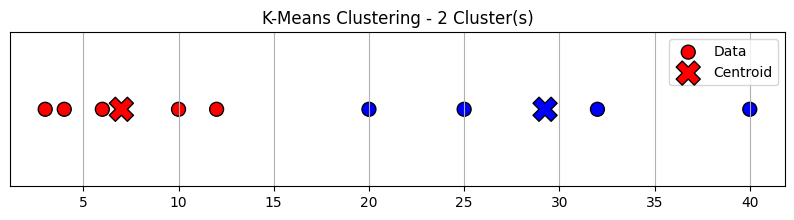

In [43]:
# Dataset
data = [4, 6, 10,12, 3, 20, 40 , 32, 25 ]

# Jalankan untuk 2 cluster
run_kmeans_clustering(data, n_clusters=2)



In [45]:
## JAWABAN NO 4


=== Hasil K-Means Clustering (K = 3) ===
Data: [1, 2, 6, 7, 8, 10, 15, 32, 20]
Label Klaster: [0 0 0 0 0 0 2 1 2]
Centroids: [ 5.66666667 32.         17.5       ]
Inertia (Jumlah kuadrat jarak ke centroid): 73.83


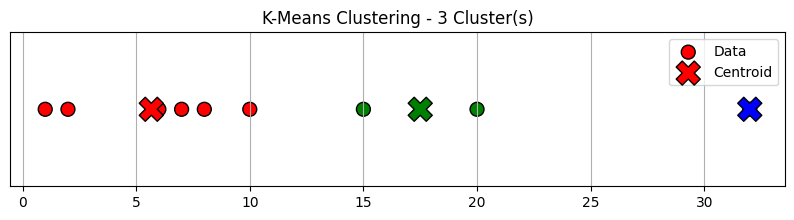

In [44]:
# Dataset
data = [ 1, 2, 6, 7, 8, 10, 15 , 32, 20 ]


# Jalankan untuk 3 cluster
run_kmeans_clustering(data, n_clusters=3)

# Soal No 5

Label tiap data: [0 1 1 0 0 0]
Koordinat centroid:
[[193.5   72.25]
 [179.    56.  ]]


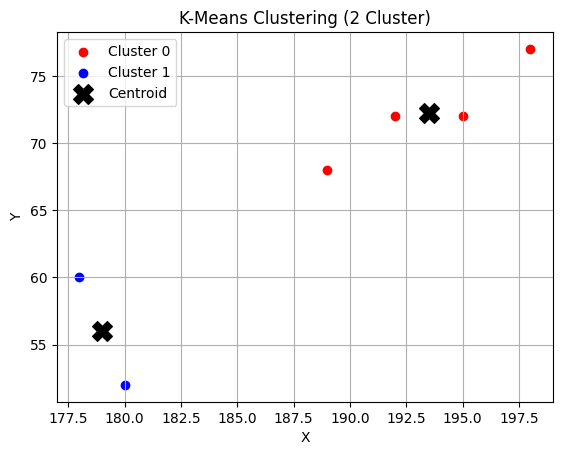

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset: [X, Y]
X = np.array([
    [195 , 72 ],
    [180 , 52 ],
    [178 , 60 ],
    [189 , 68 ],
    [192 , 72 ],
    [198 , 77 ]
])

# Buat model KMeans dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Dapatkan hasil clustering
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Tampilkan hasil
print("Label tiap data:", labels)
print("Koordinat centroid:")
print(centroids)

# Visualisasi hasil clustering
colors = ['red', 'blue']
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]], label=f'Cluster {labels[i]}' if i == 0 or i == 1 else "")

# Centroid
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroid')

plt.title("K-Means Clustering (2 Cluster)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()
